In [4]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as ks

dataset_path = "/kaggle/input/cifar10-python/cifar-10-batches-py"


def unpickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

# Load all training batches
all_images = []
all_labels = []

for i in range(1, 6):  # data_batch_1 to data_batch_5
    batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
    images = batch[b'data']
    labels = batch[b'labels']
    
    # Reshape and transpose images to (num_images, 32, 32, 3)
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    all_images.append(images)
    all_labels.extend(labels)

# Combine all batches into single arrays
all_images = np.concatenate(all_images, axis=0)
all_labels = np.array(all_labels)

# Normalize pixel values to [0,1]
all_images = all_images.astype('float32') / 255.0

print("Images shape:", all_images.shape)
print("Labels shape:", all_labels.shape)

plt.figure(figsize=(10,2))
for i in range(100):
    plt.subplot(1, 100, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


2025-10-06 18:50:27.856543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759776628.159410      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759776628.240123      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Images shape: (50000, 32, 32, 3)
Labels shape: (50000,)


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

modelh31 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

modelh31.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-06 18:50:52.630380: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoding
labels_cat = to_categorical(all_labels, num_classes=10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, labels_cat, test_size=0.2, random_state=42)

In [7]:
# Compile the model
modelh31.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = modelh31.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.3238 - loss: 1.8262 - val_accuracy: 0.5163 - val_loss: 1.3491
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5435 - loss: 1.2883 - val_accuracy: 0.5933 - val_loss: 1.1482
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6149 - loss: 1.1031 - val_accuracy: 0.6295 - val_loss: 1.0491
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6509 - loss: 0.9924 - val_accuracy: 0.6532 - val_loss: 0.9708
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6772 - loss: 0.9113 - val_accuracy: 0.6613 - val_loss: 0.9559
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7128 - loss: 0.8231 - val_accuracy: 0.6800 - val_loss: 0.9052
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7310 - loss: 0.7640 - val_accuracy: 0.6901 - val_loss: 0.9046
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7493 - loss: 0.7169 - 

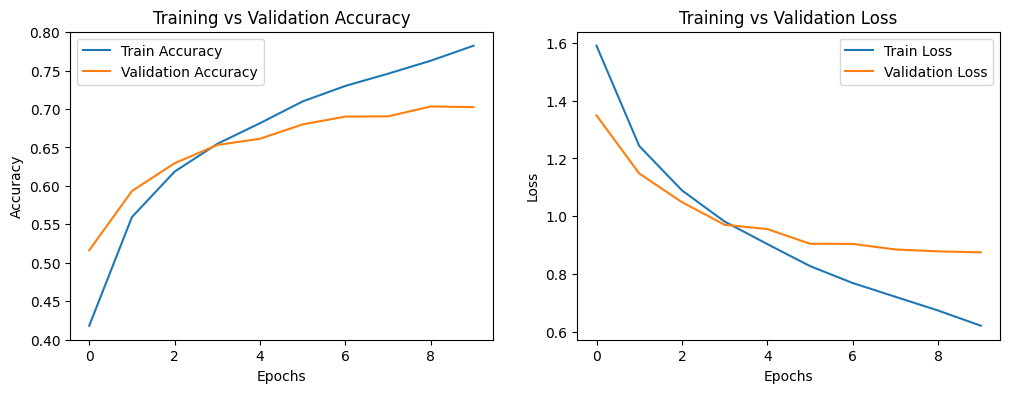

In [8]:
# --- Plot training history ---
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


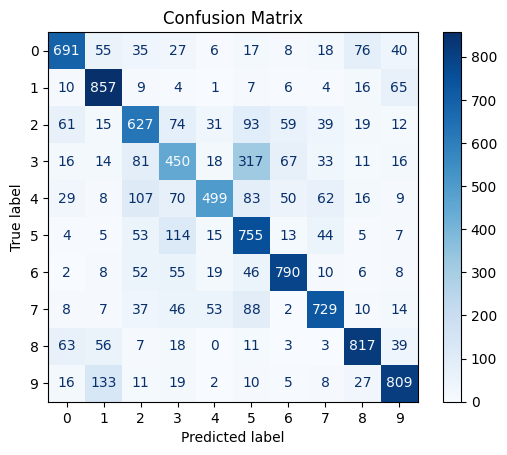

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 1. Make predictions on the test set
y_pred = modelh31.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)  


cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))  # replace list(range(10)) with class names if you have them
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
my_model = modelh31.save('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


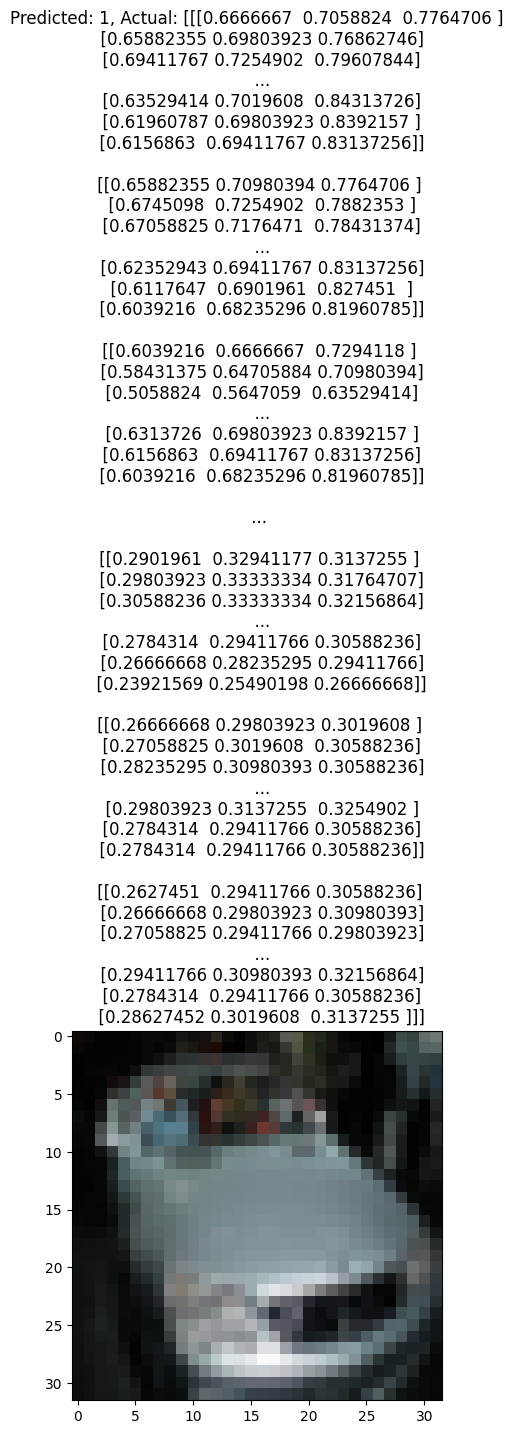

In [22]:
test_images = X_val
img = test_images[4].reshape(1, 32, 32, 3)
prediction = modelh31.predict(img)
predicted_class = np.argmax(prediction)

plt.imshow(test_images[4])
plt.title(f"Predicted: {predicted_class}, Actual: {all_images[4]}")
plt.show()